### **Titanic Data Set EDA**

# **Task 1: Loading the data set **

- Prompt:
load the Titanic csv and load it into a pandas data frame, creating a copy of the data frame to protect it during analysis.

In [46]:
import pandas as pd

# Load the Titanic dataset from the file system
titanic_df = pd.read_csv('/content/Titanic.csv')


# Task 2: Clean the Data: Handle missing values and check data types

- Prompt: Undergo data cleaning and preprocessing steps. Remove missing values. Check the data types and include any other steps that will help make the analysis more rohbust. Go through this process step by step.

## Identify missing values

### Subtask:
Check for missing values in the DataFrame and visualize their distribution.


In [57]:
# Check for missing values
missing_values = titanic_df.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Prompt: Remove missing cabin values and create a predictive model (Random Forrest) from the variables to predict the missing age.

In [48]:
df_not_null_age = titanic_df[titanic_df['Age'].notnull()].copy()
df_null_age = titanic_df[titanic_df['Age'].isnull()].copy()

features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

X_train = df_not_null_age[features]
y_train = df_not_null_age['Age']

X_test = df_null_age[features]

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor

categorical_features = ['Sex', 'Embarked', 'Pclass']
numerical_features = ['SibSp', 'Parch', 'Fare']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

model = RandomForestRegressor(random_state=42)
model.fit(X_train_encoded, y_train)

RandomForestRegressor(random_state=42)

In [50]:
predicted_ages = model.predict(X_test_encoded)

In [51]:
df_null_age['Age'] = predicted_ages
titanic_df = pd.concat([df_not_null_age, df_null_age], ignore_index=True)

Prompt: The Cabin variable has too many missing values, since it is not important, drop the entire collumn.

In [59]:

# Drop the 'Cabin' column
titanic_df_cleaned = titanic_df.drop('Cabin', axis=1).copy()

# Remove rows with missing 'Embarked' values from the cleaned DataFrame
titanic_df_cleaned.dropna(subset=['Embarked'], inplace=True)

# Check for remaining missing values
missing_values_after_handling = titanic_df_cleaned.isnull().sum()
print("Missing values per column after handling:")
print(missing_values_after_handling)

Missing values per column after handling:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Task 3: Explore Summary statistics and distributions.
- Prompt: Generate useful summary statistics and relevant distribtuions that enhance the analysis. Go through this process step by step and include tips on things to look at further to make the analysis better.\

In [60]:
# Generate descriptive statistics for numerical columns
descriptive_stats = titanic_df_cleaned.describe()

# Display the descriptive statistics
print("Descriptive statistics for numerical columns:")
print(descriptive_stats)

Descriptive statistics for numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   29.525484    0.524184   
std     256.998173    0.486260    0.834700   13.681658    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   21.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.000000    1.000000    3.000000   37.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  889.000000  889.000000  
mean     0.382452   32.096681  
std      0.806761   49.697504  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


Prompt: do no include passenger ID , that data is not helpful to visualize for the visualization of numeric collumns

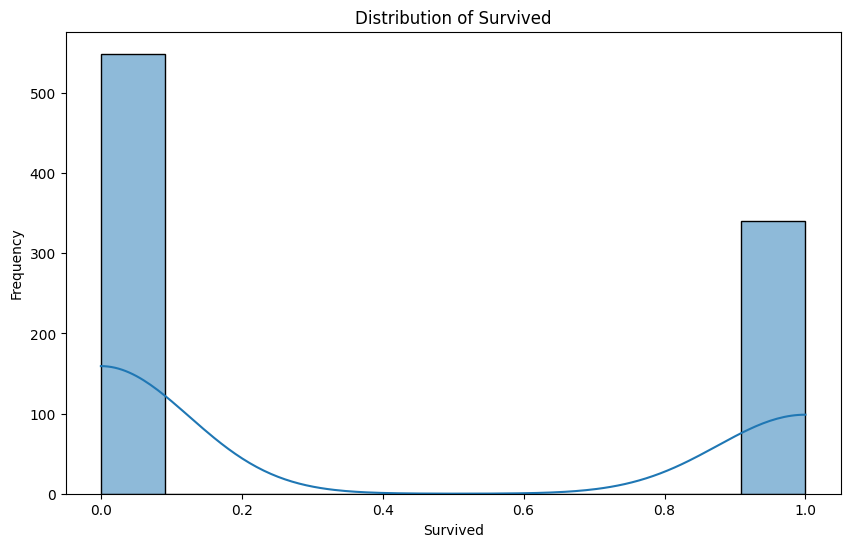

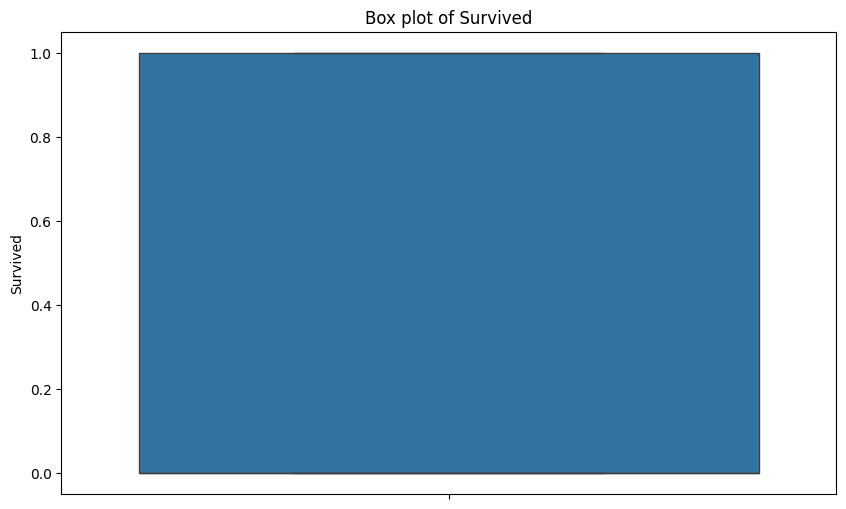

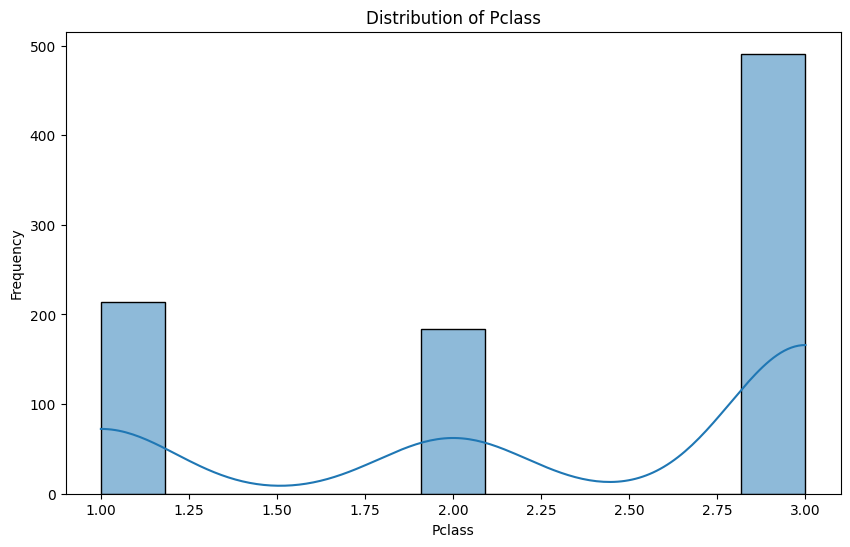

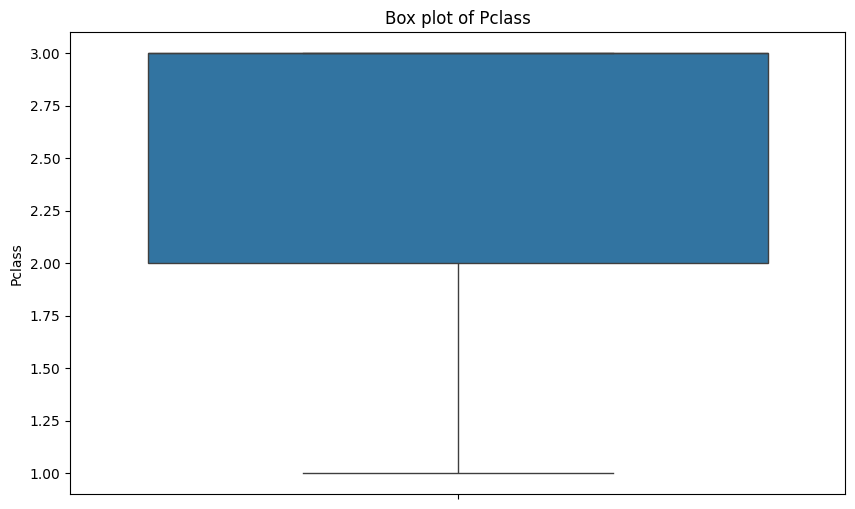

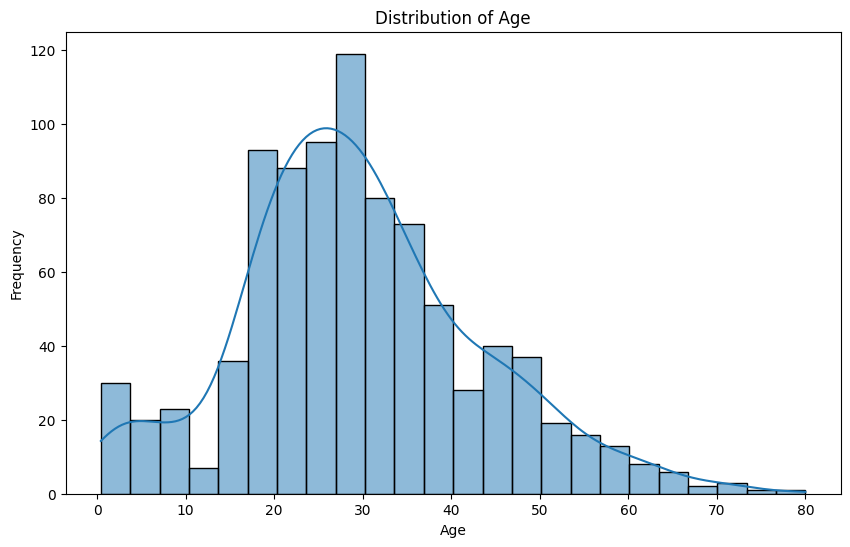

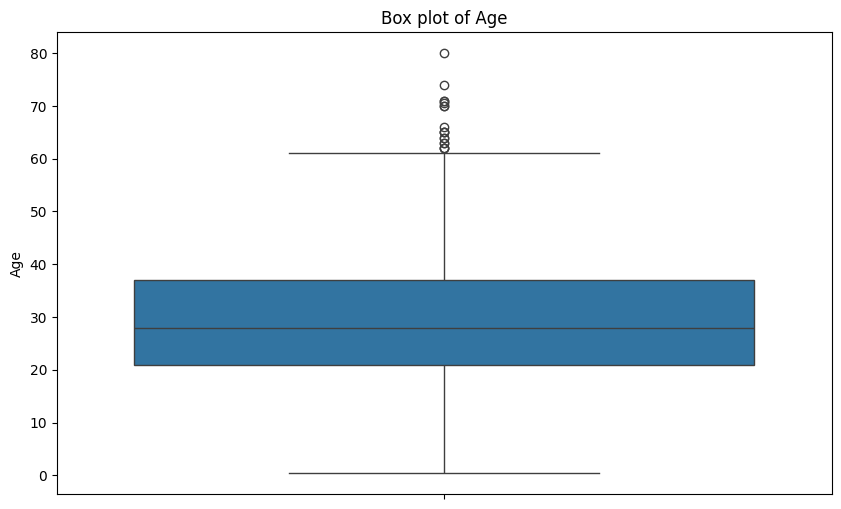

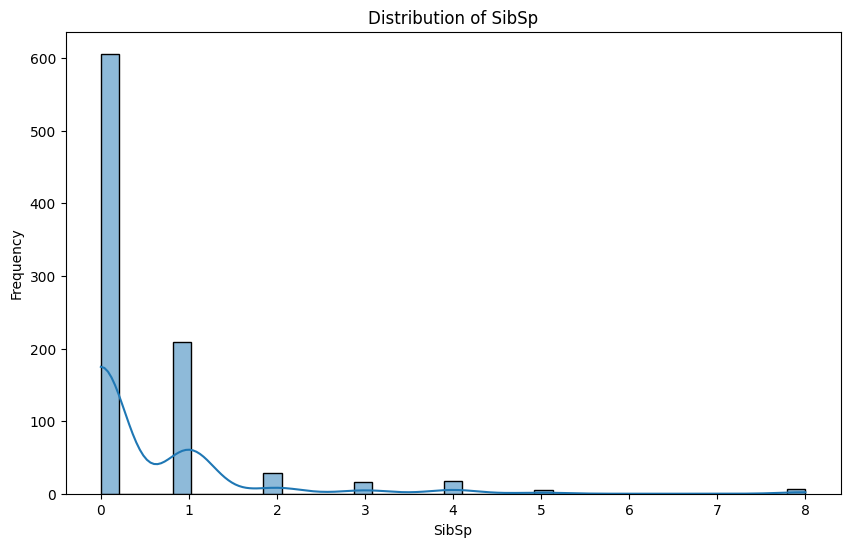

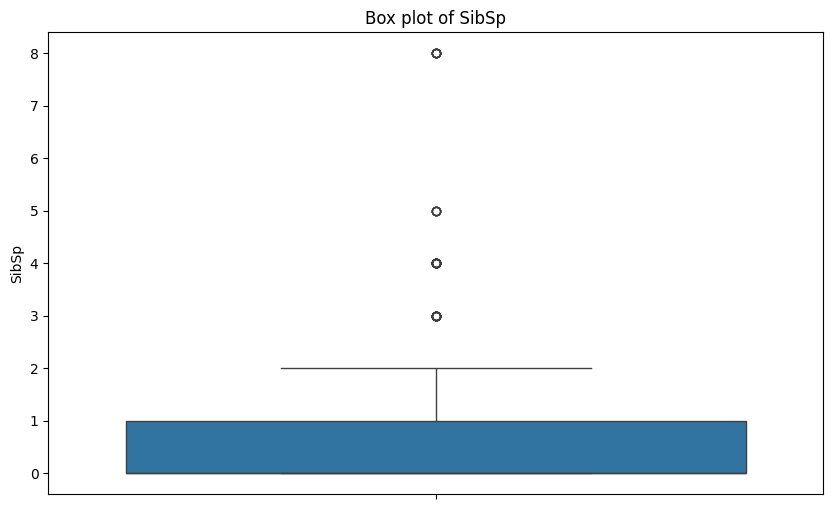

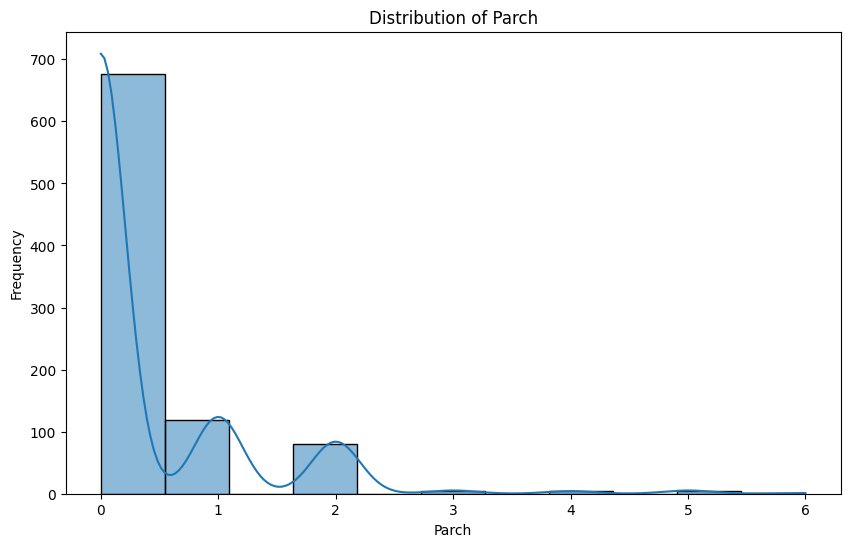

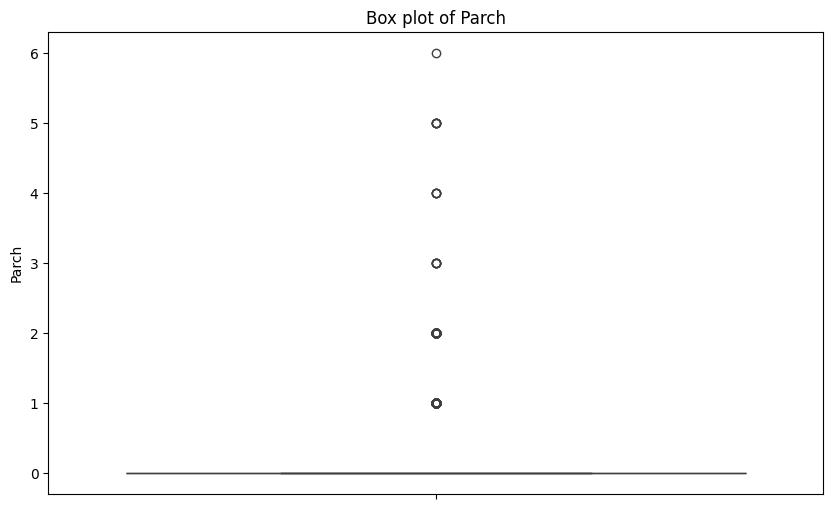

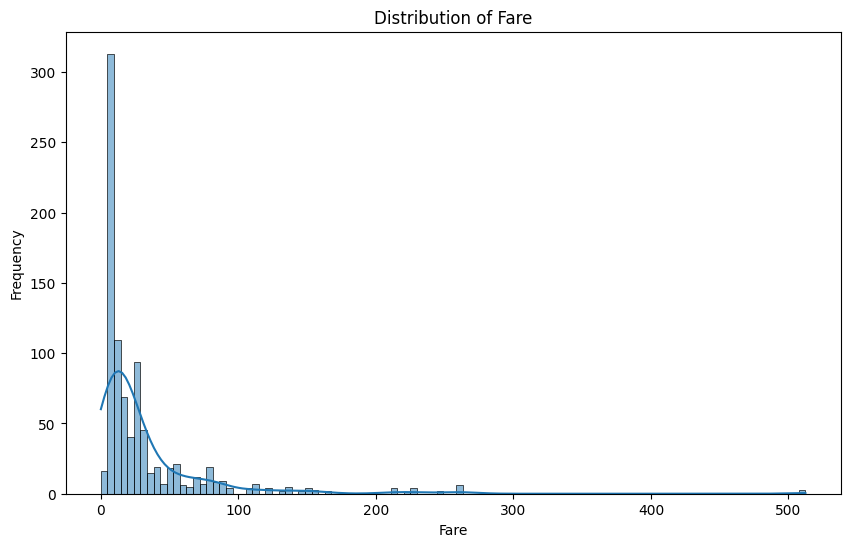

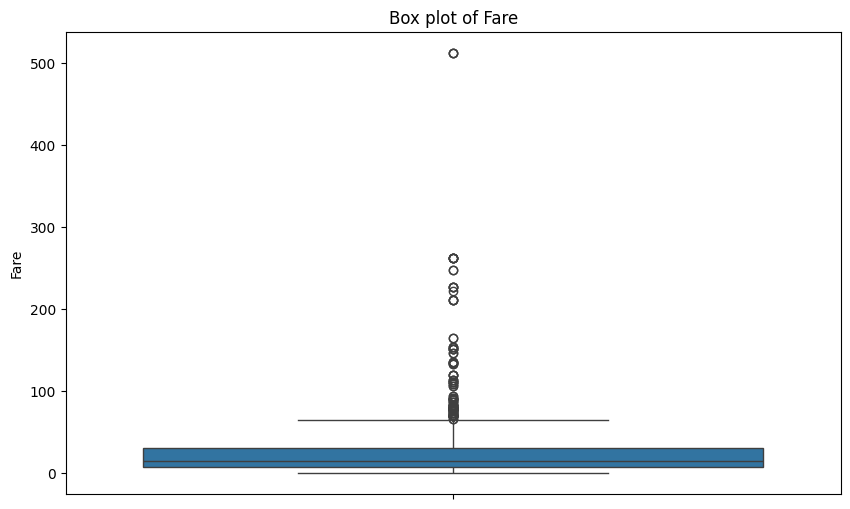

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_cols = titanic_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Remove 'PassengerId' from numerical columns as it is not helpful to visualize
numerical_cols = numerical_cols.drop('PassengerId')

# Visualize the distributions of numerical features
for col in numerical_cols:
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=titanic_df_cleaned, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=titanic_df_cleaned, y=col)
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

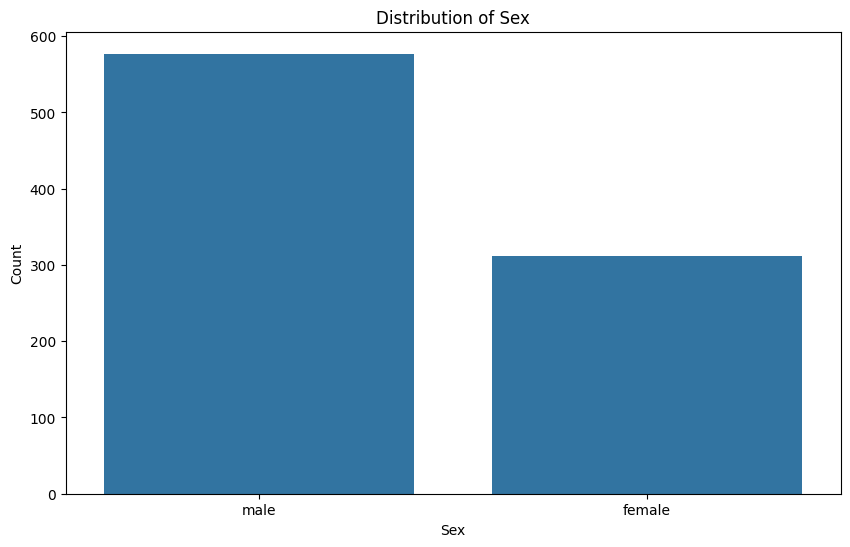

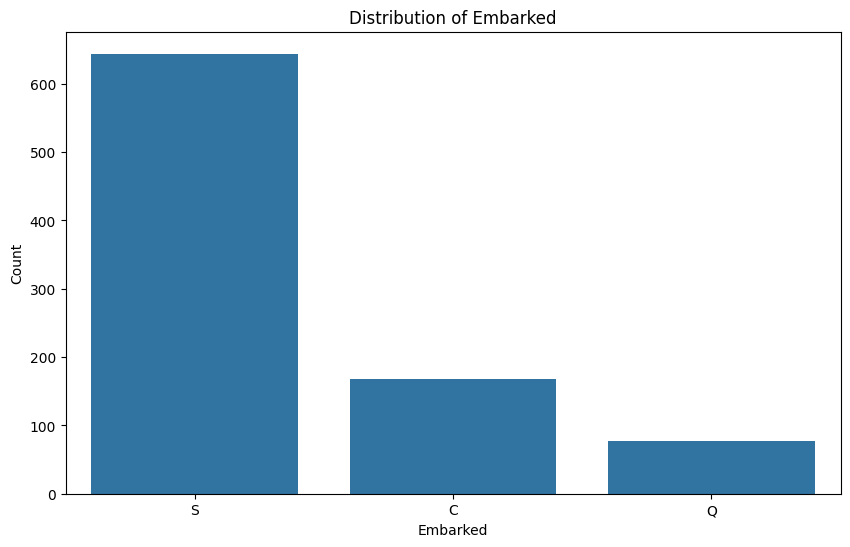

In [62]:
# Select categorical columns to visualize
categorical_cols_to_viz = ['Sex', 'Embarked']

# Visualize the distributions of the selected categorical features
for col in categorical_cols_to_viz:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=titanic_df_cleaned, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Task 4: Visualize survival rates by gender, age group and class.

- Prompt: Visualize the survivial rates by gender, age group and class. Come up with multiple ways to visualize these and I will decide which communicates the message best

## Visualize survival rate by gender

### Subtask:
Create visualizations (e.g., bar plot) to show the survival rate for males and females.


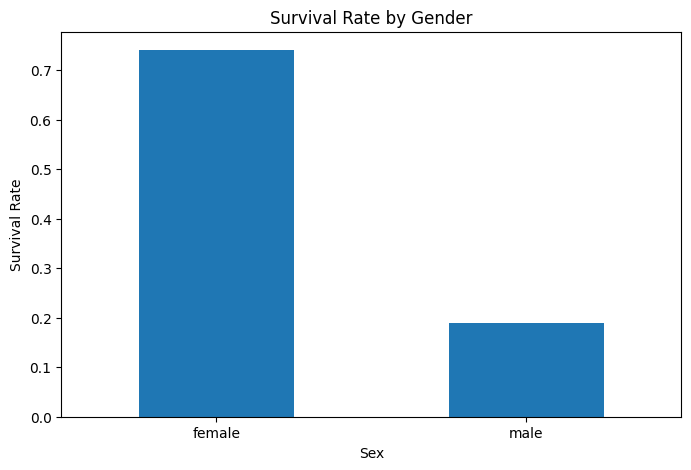

In [63]:
# Calculate survival rate by gender
survival_rate_by_gender = titanic_df_cleaned.groupby('Sex')['Survived'].mean()

# Create a bar plot of survival rate by gender
plt.figure(figsize=(8, 5))
survival_rate_by_gender.plot(kind='bar')
plt.title('Survival Rate by Gender')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

## Visualize survival rate by passenger class

### Subtask:
Create visualizations (e.g., bar plot) to show the survival rate for each passenger class.


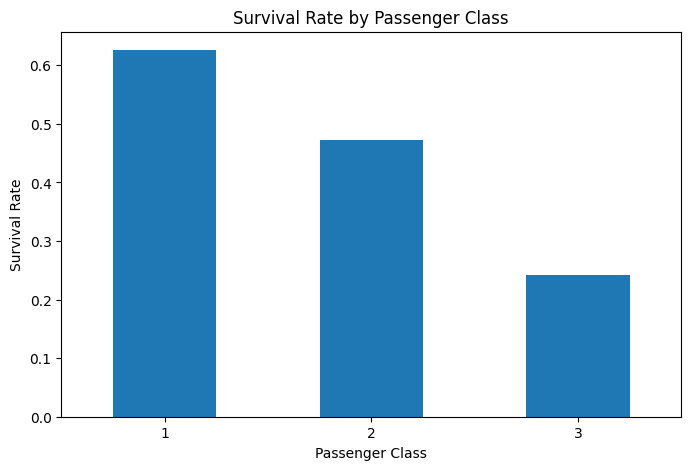

In [64]:
# Calculate survival rate by passenger class
survival_rate_by_class = titanic_df_cleaned.groupby('Pclass')['Survived'].mean()

# Create a bar plot of survival rate by passenger class
plt.figure(figsize=(8, 5))
survival_rate_by_class.plot(kind='bar')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.show()

## Create age groups

### Subtask:
Categorize passengers into age groups to analyze survival rates across different age ranges.


In [65]:
# Define age group bins and labels
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Create a new column 'AgeGroup' based on 'Age'
titanic_df_cleaned['AgeGroup'] = pd.cut(titanic_df_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

# Display the value counts of the 'AgeGroup' column
print("\nValue counts of AgeGroup:")
print(titanic_df_cleaned['AgeGroup'].value_counts())


Value counts of AgeGroup:
AgeGroup
21-30    288
31-40    222
11-20    125
41-50    108
0-10      67
51-60     54
61-70     18
71-80      6
Name: count, dtype: int64


## Visualize survival rate by age group

### Subtask:
Create visualizations (e.g., bar plot) to show the survival rate for each age group.


/tmp/ipython-input-1157308644.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = titanic_df_cleaned.groupby('AgeGroup')['Survived'].mean()


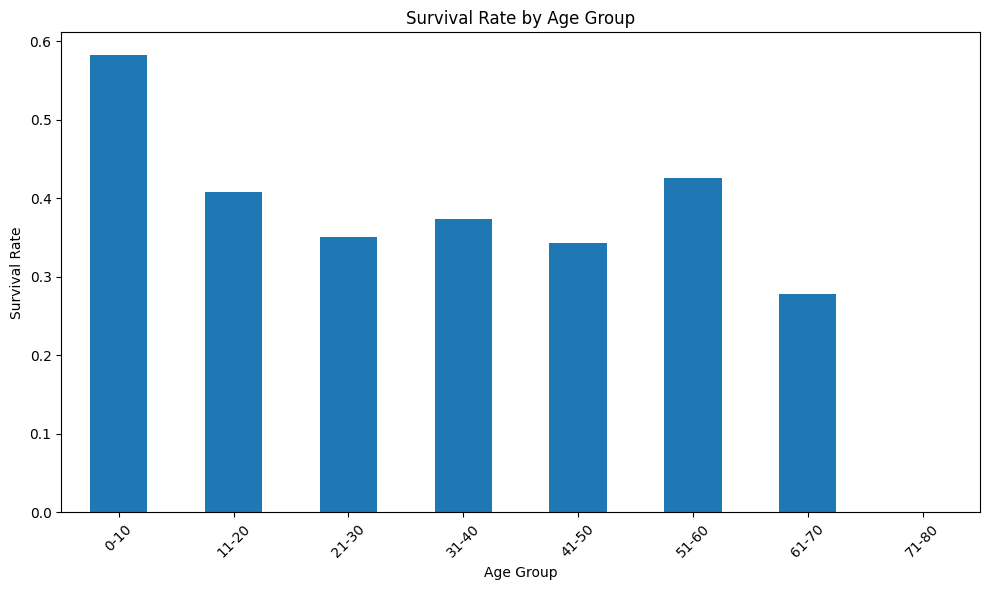

In [66]:
# Calculate the mean survival rate for each age group
survival_rate_by_age_group = titanic_df_cleaned.groupby('AgeGroup')['Survived'].mean()

# Create a bar plot of the survival rate by age group
plt.figure(figsize=(10, 6))
survival_rate_by_age_group.plot(kind='bar')
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Task 5: Identify potential predictors of survival

Prompt: Identify the potential predictors of survival, specifically looking at age and gender and other factors in the correlation matrix that had higher correlation with survival

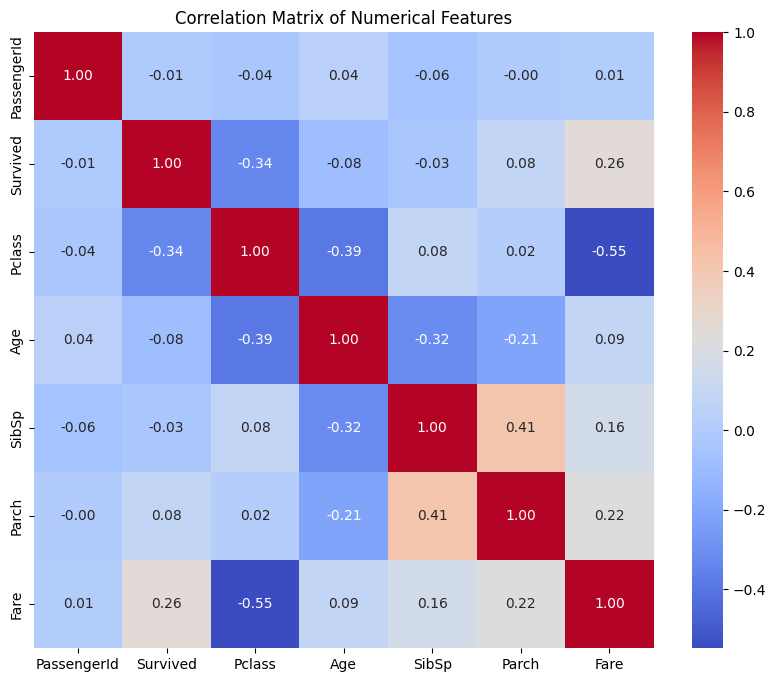

In [67]:
# Select numerical columns for correlation analysis
numerical_cols_for_corr = titanic_df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_cols_for_corr.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

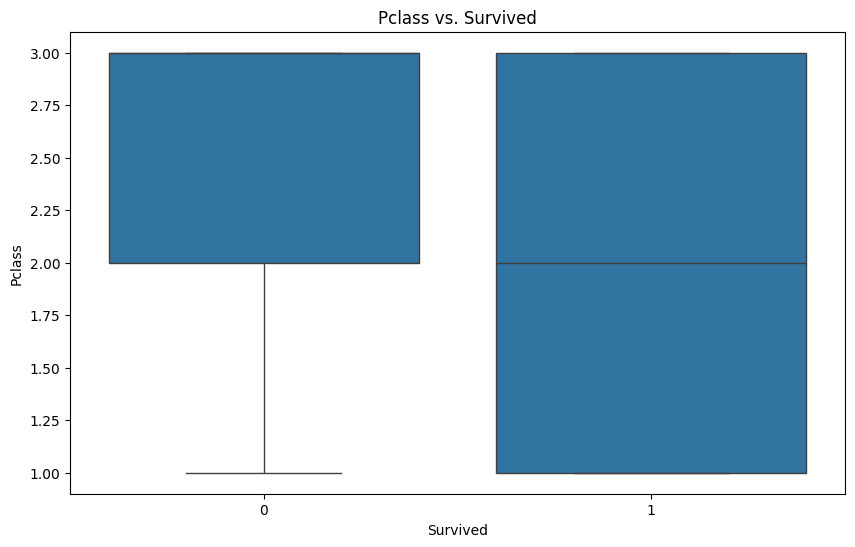

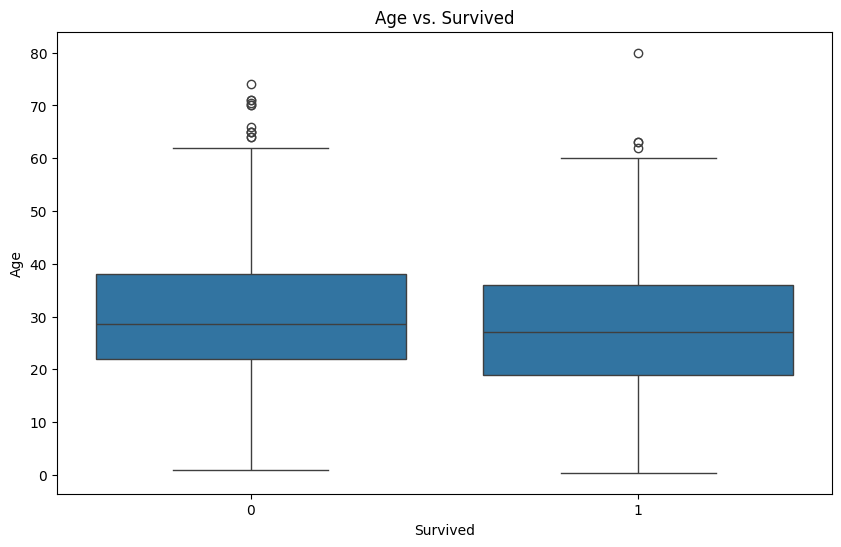

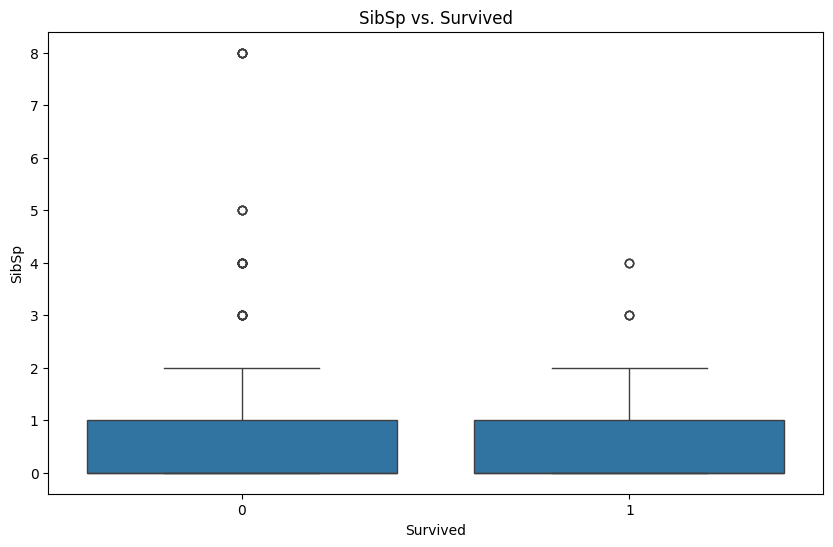

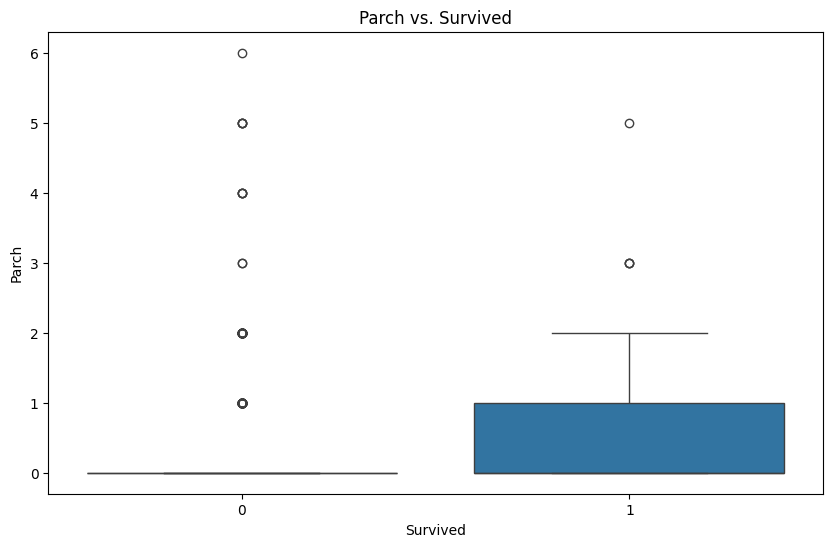

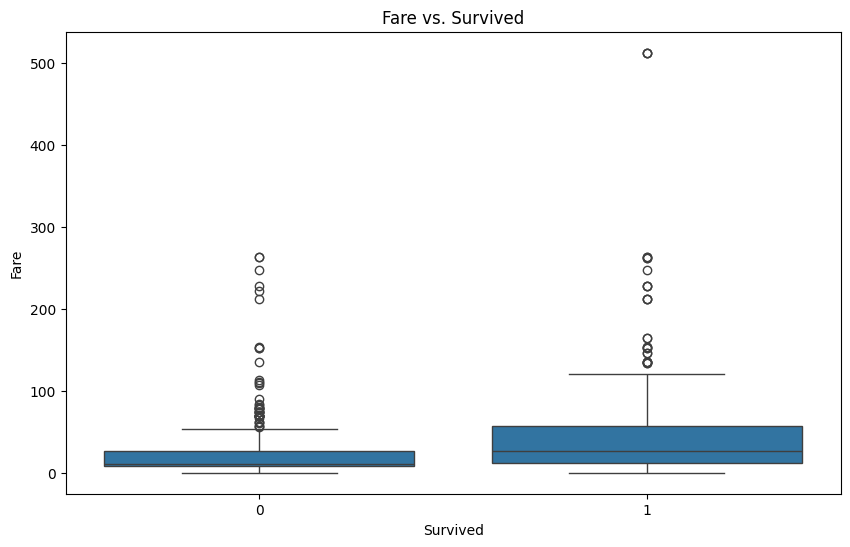

In [68]:
# Select numerical columns
numerical_cols = titanic_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

# Remove 'PassengerId' from numerical columns as it is not relevant for relationship analysis with 'Survived'
numerical_cols = numerical_cols.drop(['PassengerId'], errors='ignore')

# Create visualizations for numerical features vs. Survived
for col in numerical_cols:
    if col != 'Survived':
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=titanic_df_cleaned, x='Survived', y=col)
        plt.title(f'{col} vs. Survived')
        plt.xlabel('Survived')
        plt.ylabel(col)
        plt.show()

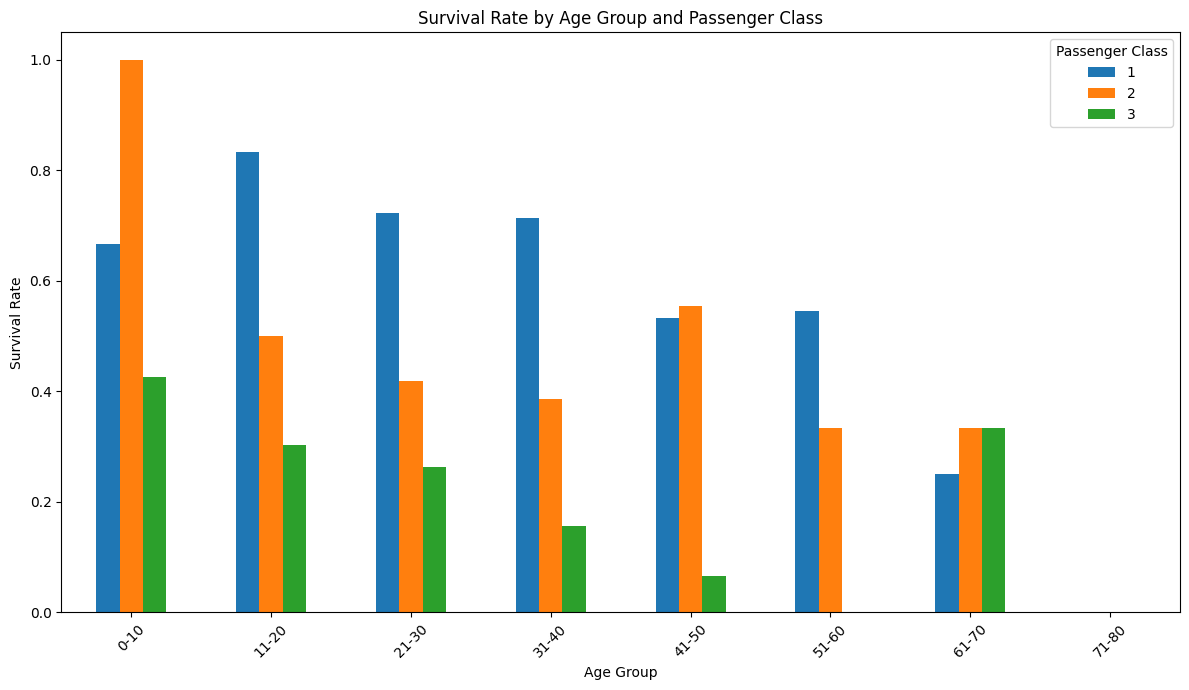

In [69]:
# Calculate survival rate by age group and passenger class
survival_rate_age_class = titanic_df_cleaned.groupby(['AgeGroup', 'Pclass'], observed=False)['Survived'].mean().unstack()

# Create a grouped bar plot of survival rate by age group and passenger class
survival_rate_age_class.plot(kind='bar', figsize=(12, 7))
plt.title('Survival Rate by Age Group and Passenger Class')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.legend(title='Passenger Class')
plt.tight_layout()
plt.show()

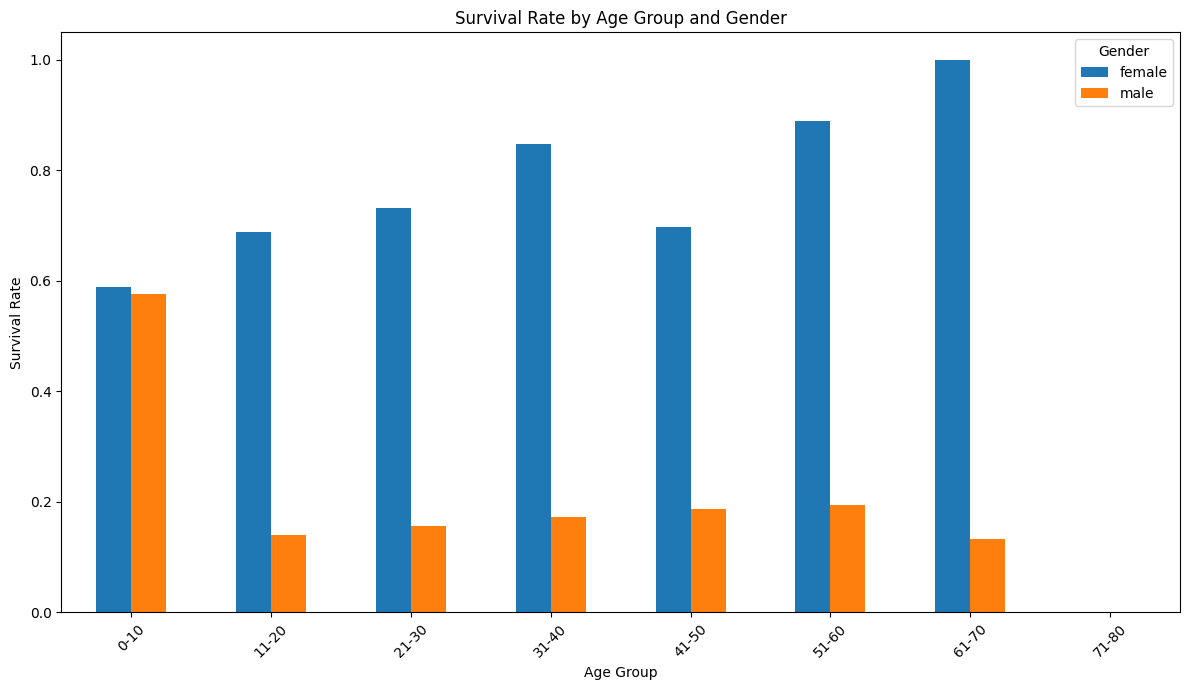

In [70]:
# Calculate survival rate by age group and gender
survival_rate_age_gender = titanic_df_cleaned.groupby(['AgeGroup', 'Sex'], observed=False)['Survived'].mean().unstack()

# Create a grouped bar plot of survival rate by age group and gender
survival_rate_age_gender.plot(kind='bar', figsize=(12, 7))
plt.title('Survival Rate by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

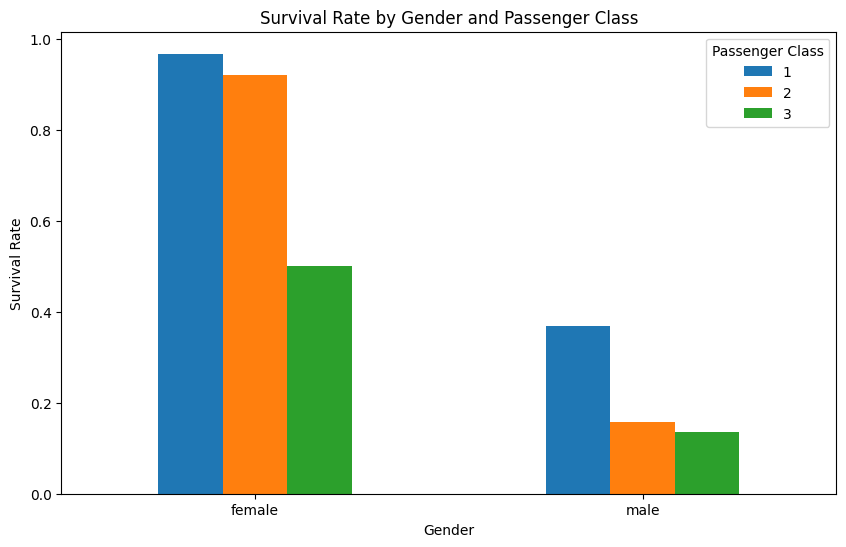

In [71]:
# Calculate survival rate by gender and passenger class
survival_rate_gender_class = titanic_df_cleaned.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

# Create a grouped bar plot of survival rate by gender and passenger class
survival_rate_gender_class.plot(kind='bar', figsize=(10, 6))
plt.title('Survival Rate by Gender and Passenger Class')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0)
plt.legend(title='Passenger Class')
plt.show()

# 3 insights:

1. Gender was a primary factor in survival, with females having a significantly higher survival rate than males. This can be clearly shown by the Survival Rate by Gender plot. Also seen in the survival rate by Gender and Passenger Class

2. Passengers class also plays a crucial role in survival, higher class passengers have better survival rates. Seen in the Survival rate by passenger class bar plot.

3. Age influenced survival with younder individuals have a higher chance of survival. From the bar plot that compares age and gender, younger females have the highest chance. The correlation matrix further shows that age and survival rate have a negative correlation